In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)



In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
measurement_tb = Base.classes.measurement
station_tb = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [63]:
# Find the most recent date in the data set.
last_date = session.query(measurement_tb.date.desc()).order_by(measurement_tb.date.desc()).first()[0]
last_date


'2017-08-23'

<function matplotlib.pyplot.show(*args, **kw)>

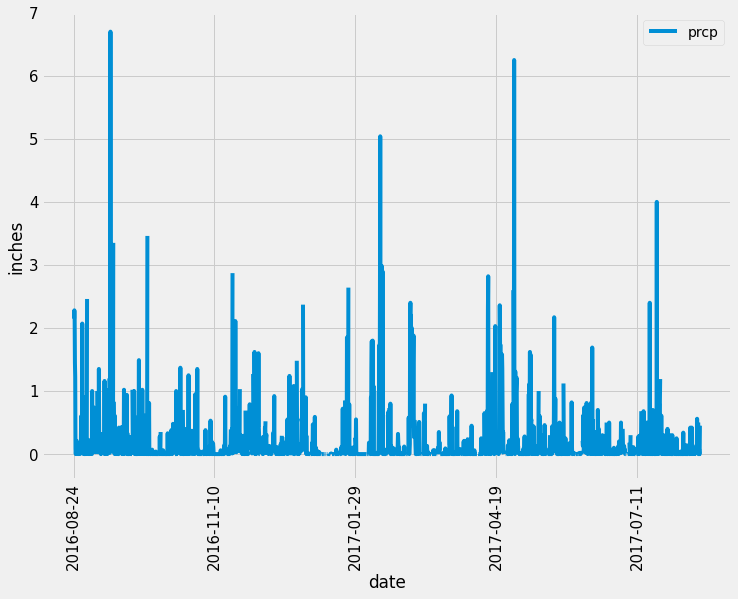

In [120]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_12 = dt.datetime.strptime(last_date,'%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement_tb.date, measurement_tb.prcp).\
filter(measurement_tb.date >= last_12).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns=['date', 'prcp'])
df.set_index('date', inplace=True)




# Sort the dataframe by date
df_sorted = df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(figsize=(11,8))
plt.ylabel("inches")
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(size=15)
plt.ylim(-0.4,7)

plt.show



In [121]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_sorted.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [122]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(station_tb.station).\
                             group_by(station_tb.station).count()
print(f'The number of unique stations in this database is: {number_stations}')

The number of unique stations in this database is: 9


In [127]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurement_tb.station,func.count(measurement_tb.station)).\
    filter(station_tb.station == measurement_tb.station).group_by(measurement_tb.station).\
    order_by(func.count(station_tb.station).desc()).all()
print('The following stations have the most rows in desc order:')
most_active



The following stations have the most rows in desc order:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [130]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_hi_avg = session.query(func.min(measurement_tb.tobs),func.max(measurement_tb.tobs),\
    func.avg(measurement_tb.tobs)).filter(measurement_tb.station == 'USC00519281').first()
low_hi_avg



(54.0, 85.0, 71.66378066378067)

(array([55., 60., 65., 70., 75., 80., 85.]),
 <a list of 7 Text major ticklabel objects>)

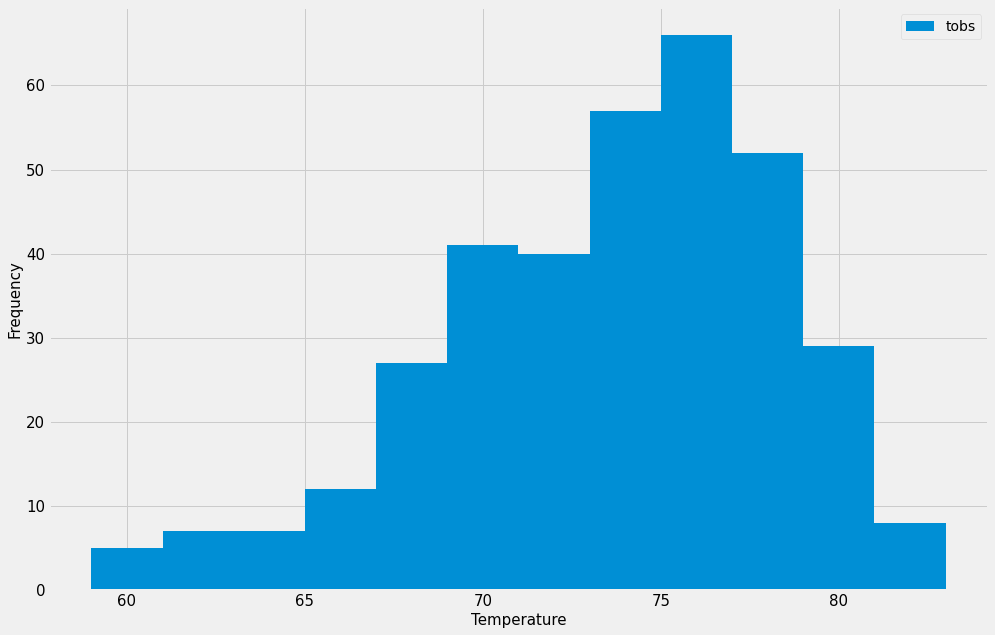

In [154]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement_tb.tobs).\
            filter(measurement_tb.date >= last_12).\
            filter_by(station ='USC00519281').all()

# Plot the results as a histogram
plt.figure(figsize=(15,10))
plt.hist(np.ravel(results), bins=12)
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend(['tobs'], loc = 'upper right')
plt.yticks(size=15)
plt.xticks(size=15)

# Close session

In [155]:
# Close Session
session.close()